<a href="https://colab.research.google.com/github/songqsh/foo1/blob/master/src/learning_quadratic_function_by_nn_normalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn

import numpy as np

import torch.nn.functional as F
import matplotlib.pyplot as plt


Our objective is to learn a quadratic function. 
The target function to learn is
$$f(x) = x^2 + 2x -1.$$
This can not be learned well in the previous experiment, see 
[here](https://github.com/songqsh/foo1/blob/master/src/Copy_of_Copy_of_learning_quadratic_function_by_nn.ipynb)

In [0]:

# target function
f = lambda x: (x-10)**2+2*x-1.

- We use the following network for the forward pass, but the result is not good.

In [0]:
H1 = 5; H2 = 5 #number of hidden layer
model = nn.Sequential(
    nn.Linear(1, H1), 
    nn.Sigmoid(),
    nn.Linear(H1, H2),
    nn.Sigmoid(),
    nn.Linear(H2,2),
    nn.Linear(2,1)
)

In [0]:

#loss function 
criterion = nn.MSELoss()
#optimizer
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.7)

In [0]:
#training data
batch_size = 21

x_train0 = torch.linspace(-5, 5, batch_size).reshape(batch_size,1)
y_train0 = f(x_train0)


def linear_transform(xx, l = 0, u= 1):
  M = torch.max(xx)
  m = torch.min(xx)
  return (u-l)/(M-m)*(xx-m)+l, m, M, l, u
x_train, x_m, x_M, x_l, x_u = linear_transform(x_train0, -1, 1)
y_train, y_m, y_M, y_l, y_u = linear_transform(y_train0, 0, 1)
#y_train0 = linear_transform(y_train, y_m, y_M)
#model(x_train)
#y_train0

In [0]:
# Train the model
epoch_n = 1000
print_n = 10
epoch_per_print= np.floor(epoch_n/print_n)

for epoch in range(epoch_n):

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)  
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % epoch_per_print == 0:
      print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, epoch_n, loss.item()))

Epoch [100/1000], Loss: 0.0936
Epoch [200/1000], Loss: 0.0927
Epoch [300/1000], Loss: 0.0902
Epoch [400/1000], Loss: 0.0769
Epoch [500/1000], Loss: 0.0031
Epoch [600/1000], Loss: 0.0010
Epoch [700/1000], Loss: 0.0008
Epoch [800/1000], Loss: 0.0006
Epoch [900/1000], Loss: 0.0005
Epoch [1000/1000], Loss: 0.0004


In [0]:
def learnedfun(x):
  out = (1-(-1))/(x_M-x_m)*(x-x_m)+(-1.)
  out = model(out)
  out = (y_M- y_m)*out+y_m
  return out

y_pred = learnedfun(x_train0)  

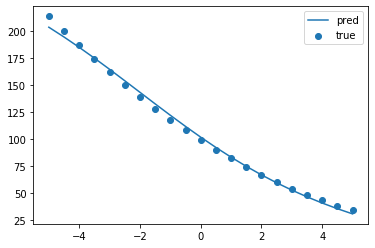

In [0]:
#test
plt.scatter(x_train0.detach().numpy(), y_train0.detach().numpy(), label='true')
plt.plot(x_train0.detach().numpy(), y_pred.detach().numpy(), label='pred')

plt.legend()
plt.show()